In [ ]:
# @title
!pip install ultralytics roboflow
import os
ROBOFLOW_API_KEY = os.getenv("ROBOFLOW_API_KEY")

from roboflow import Roboflow
rf = Roboflow(api_key=ROBOFLOW_API_KEY)
project = rf.workspace("situational-awarnessinnovsense").project("fire-detection-ypseh")
version = project.version(1)
dataset = version.download("yolov11")


loading Roboflow workspace...
loading Roboflow project...


In [ ]:
from ultralytics import YOLO

# Model seçimi: 'yolo11n.pt' (Nano) en hızlısıdır ve ödevler için idealdir.
# Model büyüdükçe başarı artar ama eğitim süresi uzar.
model = YOLO('yolo11n.pt')

# Eğitimi başlat
# data= parametresine indirilen klasörün içindeki 'data.yaml' dosyasının tam yolunu veriyoruz.
results = model.train(
    data='/content/Fire-Detection-1/data.yaml',  # Klasör ismini kontrol et!
    epochs=50,      # Veri setinin üzerinden 50 kere geçecek
    imgsz=640,      # Resimler 640x640 piksele boyutlandırılacak
    batch=16,       # Her seferde 16 resim işlenecek
    name='yangin_modelim', # Sonuçların kaydedileceği klasör adı
    device=0        # GPU kullanımı
)

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.
Ultralytics 8.3.241 🚀 Python-3.12.12 torch-2.9.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, compile=False, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/Fire-Detection-1/data.yaml, degrees=0.0, deterministic=True, device=0, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=50, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, ker


image 1/1 /content/Fire-Detection-1/test/images/middle_-1969-_jpg.rf.8fe8e857b0726bf1179b5b42f3dd8915.jpg: 640x640 2 Fires, 4 Smokes, 7.9ms
Speed: 1.4ms preprocess, 7.9ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)
Results saved to /content/runs/detect/predict10


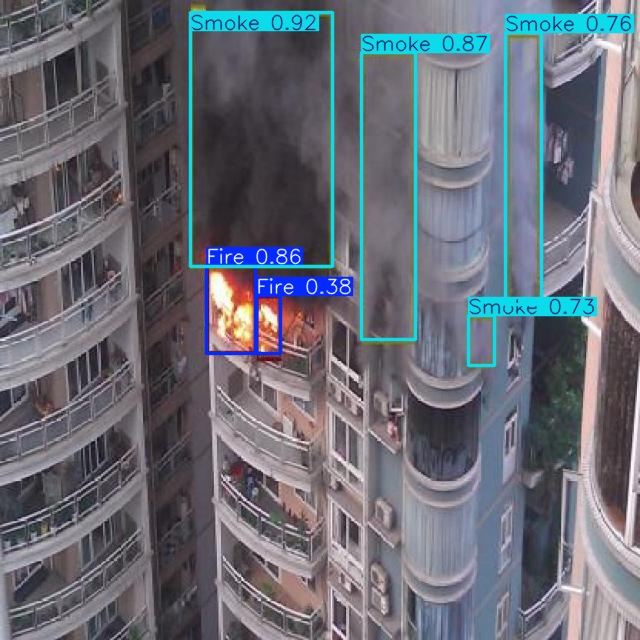

In [ ]:
from IPython.display import Image, display

# Eğittiğin en iyi modelin ağırlıklarını (weights) yüklüyoruz
best_model = YOLO('/content/runs/detect/yangin_modelim/weights/best.pt')

# Test klasöründen rastgele bir resim üzerinde tahmin yapalım
# glob kütüphanesi ile test klasöründen bir resim buluyoruz
import glob
import random

# Test resimlerinin olduğu yolu buraya yaz (klasör ismine dikkat)
test_images = glob.glob('/content/Fire-Detection-1/test/images/*.jpg')
random_image = random.choice(test_images)

# Tahmin yap
results = best_model.predict(
    source=random_image,
    conf=0.25,  # %25 ve üzeri ihtimalle yangın görüyorsa çiz
    save=True
)

# Sonucu ekrana bas
display(Image(filename=results[0].save_dir + '/' + random_image.split('/')[-1]))

In [ ]:
# 1. Klasörü zip dosyası haline getir
!zip -r /content/yangin_projesi_full.zip /content/runs/detect/yangin_modelim

# 2. İndirme işlemini başlat (Tarayıcın indirmeyi otomatik başlatacak)
from google.colab import files
files.download("/content/yangin_projesi_full.zip")

  adding: content/runs/detect/yangin_modelim/ (stored 0%)
  adding: content/runs/detect/yangin_modelim/val_batch2_labels.jpg (deflated 10%)
  adding: content/runs/detect/yangin_modelim/val_batch0_pred.jpg (deflated 7%)
  adding: content/runs/detect/yangin_modelim/train_batch1.jpg (deflated 3%)
  adding: content/runs/detect/yangin_modelim/results.png (deflated 8%)
  adding: content/runs/detect/yangin_modelim/val_batch0_labels.jpg (deflated 8%)
  adding: content/runs/detect/yangin_modelim/BoxF1_curve.png (deflated 11%)
  adding: content/runs/detect/yangin_modelim/weights/ (stored 0%)
  adding: content/runs/detect/yangin_modelim/weights/best.pt (deflated 10%)
  adding: content/runs/detect/yangin_modelim/weights/last.pt (deflated 10%)
  adding: content/runs/detect/yangin_modelim/val_batch2_pred.jpg (deflated 9%)
  adding: content/runs/detect/yangin_modelim/train_batch0.jpg (deflated 4%)
  adding: content/runs/detect/yangin_modelim/confusion_matrix_normalized.png (deflated 31%)
  adding: co

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

### Model Eğitim Sonuçları Değerlendirmesi

Model eğitimi başarıyla tamamlandı. `yolo11n.pt` modeli 50 epoch boyunca eğitildi ve 'Fire' ve 'Smoke' sınıfları için aşağıdaki performans metrikleri elde edildi:

*   **Genel mAP50**: 0.921
*   **Genel mAP50-95**: 0.827

**Sınıf Bazında Metrikler:**

*   **Fire (Yangın) Sınıfı:**
    *   **Precision (P)**: 0.955
    *   **Recall (R)**: 0.926
    *   **mAP50**: 0.955
    *   **mAP50-95**: 0.830

*   **Smoke (Duman) Sınıfı:**
    *   **Precision (P)**: 0.930
    *   **Recall (R)**: 0.844
    *   **mAP50**: 0.887
    *   **mAP50-95**: 0.825

Bu metrikler, modelinizin yangın ve duman tespiti konusunda oldukça başarılı olduğunu göstermektedir. Özellikle yangın sınıfı için yüksek hassasiyet ve geri çağırma değerleri elde edilmiştir.

Tüm eğitim sonuçları ve metrikler `/content/runs/detect/yangin_modelim` klasörüne kaydedilmiştir.